In [2]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [3]:
import io
def get_curve(txt):
    out = io.BytesIO(txt)
    out.seek(0)
    return np.load(out)

In [4]:
FILEPATH = '/home/jovyan/data/lightning/data-upjs/single_spotty.db'
# creating a connection to a .db file in sqllite format
conn = sqlite3.connect(FILEPATH)

In [5]:
# retrieve table names from the database
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor = conn.cursor()
cursor.execute(sql_query)
print(cursor.fetchall())

[('parameters',), ('curves',), ('auxiliary',)]


In [6]:
# load the table 'parameters'
df_parameters = pd.read_sql_query("SELECT * FROM parameters", conn)
df_parameters.head()

,id,star__mass,star__t_eff,inclination,rotation_period,star__polar_log_g,star__equivalent_radius,star__spot1_longitude,star__spot1_latitude,star__spot1_angular_radius,star__spot1_temperature_factor
0,1,1.516129e+31,18939.16619,0.794016,94.892819,2.108636,2.807034e+09,1.356982,6.282311,0.721762,1.025005
1,2,1.516129e+31,18939.16619,0.794016,94.892819,2.108636,2.807034e+09,1.356982,6.282311,0.721762,1.025005
2,3,1.516129e+31,18939.16619,0.794016,94.892819,2.108636,2.807034e+09,1.356982,6.282311,0.721762,1.025005
3,4,1.516129e+31,18939.16619,0.794016,94.892819,2.108636,2.807034e+09,1.356982,6.282311,0.721762,1.025005
4,5,1.516129e+31,18939.16619,0.794016,94.892819,2.108636,2.807034e+09,1.356982,6.282311,0.721762,1.025005


In [8]:
# create new column 'overcontact' and set values to 0
df_parameters['overcontact'] = 0

In [15]:
# load the table 'curves'
df_curves = pd.read_sql_query("SELECT * FROM curves", conn)
conn.close()

In [16]:
df_curves.head(2)

,id,Bessell_U,Bessell_B,Bessell_V,Bessell_R,Bessell_I,SLOAN_u,SLOAN_g,SLOAN_r,SLOAN_i,SLOAN_z,Kepler,GaiaDR2,TESS
0,1,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."
1,2,"b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \...","b'\x93NUMPY\x01\x00v\x00{\'descr\': \'<f8\', \..."


In [17]:
# load one curve
my_curve_values = np.frombuffer(df_curves["Bessell_U"][3000])
my_curve_values1 = get_curve(df_curves["Bessell_U"][3000])
print(my_curve_values)

[1.87585069e-309 1.17119999e+171 5.22741680e-037 8.44740097e+252
 2.65141232e+180 9.92152605e+247 2.16209968e+233 1.39938206e-076
 6.01399921e-154 6.01347002e-154 6.01347002e-154 6.01347002e-154
 6.01347002e-154 6.01347002e-154 6.01347002e-154 6.55490914e-260
 9.99599841e-001 9.99609303e-001 9.99618614e-001 9.99628327e-001
 9.99637963e-001 9.99647808e-001 9.99657210e-001 9.99666293e-001
 9.99675257e-001 9.99685100e-001 9.99694814e-001 9.99704129e-001
 9.99713748e-001 9.99723907e-001 9.99733653e-001 9.99744069e-001
 9.99755454e-001 9.99766893e-001 9.99777961e-001 9.99788657e-001
 9.99798976e-001 9.99808918e-001 9.99818479e-001 9.99827657e-001
 9.99836949e-001 9.99845861e-001 9.99854373e-001 9.99862597e-001
 9.99870939e-001 9.99879070e-001 9.99886796e-001 9.99894114e-001
 9.99901077e-001 9.99908693e-001 9.99916175e-001 9.99923240e-001
 9.99929886e-001 9.99936111e-001 9.99942467e-001 9.99948864e-001
 9.99954822e-001 9.99960338e-001 9.99965478e-001 9.99970556e-001
 9.99975178e-001 9.999793

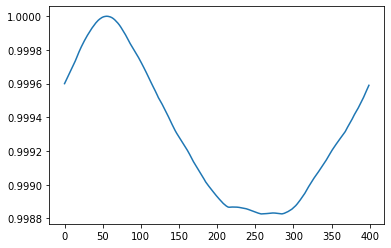

In [18]:
# curve plot
plt.plot(my_curve_values[16:])
plt.show()

In [19]:
row = df_curves.iloc[2500]
row_curves = row[1:]
my_curves = row_curves.apply(get_curve) 
print(my_curves)

Bessell_U    [0.9996059316603745, 0.9995721327694725, 0.999...
Bessell_B    [0.9996895328329308, 0.9996601360435653, 0.999...
Bessell_V    [0.9997033838940701, 0.9996741268022177, 0.999...
Bessell_R    [0.9997088177509811, 0.9996793803738007, 0.999...
Bessell_I    [0.9997269687921438, 0.9996979380337405, 0.999...
SLOAN_u      [0.9995924534566876, 0.9995579742924349, 0.999...
SLOAN_g      [0.9996946382258753, 0.9996653261390454, 0.999...
SLOAN_r      [0.9997077562543703, 0.9996783513686496, 0.999...
SLOAN_i      [0.9997181874008763, 0.9996888160856434, 0.999...
SLOAN_z      [0.999737138760613, 0.999708449743672, 0.99972...
Kepler       [0.9997041846846204, 0.9996748769755877, 0.999...
GaiaDR2      [0.999694366074094, 0.999664577981271, 0.99967...
TESS         [0.999732720078268, 0.9997048511304316, 0.9997...
Name: 2500, dtype: object


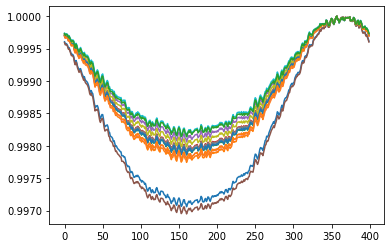

In [20]:
# plot one curve of all 13 filters
for c in my_curves:
    plt.plot(c)
    
plt.show()

In [21]:
# The  parameter 'overcontact' is assigned to each curve in the table 'Curves' so that only one table is created
df1 = df_curves[["id","Bessell_U", "Bessell_B", "Bessell_V", "Bessell_R", "Bessell_I"]]
df2 = df_parameters[["id", "overcontact"]]
df_merged = pd.merge(df1,df2,on="id")
df_merged["Bessell_U"] = df_merged["Bessell_U"].apply(get_curve)
df_merged["Bessell_B"] = df_merged["Bessell_B"].apply(get_curve)
df_merged["Bessell_V"] = df_merged["Bessell_V"].apply(get_curve)
df_merged["Bessell_R"] = df_merged["Bessell_R"].apply(get_curve)
df_merged["Bessell_I"] = df_merged["Bessell_I"].apply(get_curve)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 0 to 6852
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6853 non-null   int64 
 1   Bessell_U    6853 non-null   object
 2   Bessell_B    6853 non-null   object
 3   Bessell_V    6853 non-null   object
 4   Bessell_R    6853 non-null   object
 5   Bessell_I    6853 non-null   object
 6   overcontact  6853 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 428.3+ KB


In [22]:
# saving the table in .pkl format
df_merged.to_pickle("single_spotty.pkl")